In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Bank-Records.csv")

In [3]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [4]:
print("number of records -", df.shape[0])
print("number of features - ", df.shape[1])

number of records - 10000
number of features -  18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
## lets check the missing values now
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
## drop row number and surname since customerID is good enough to identify a customer
df.drop(['RowNumber', 'Surname'], axis = 1, inplace = True)

In [8]:
##  let's segregate numeric and categorical features

categorical  = list()
numerical = list()

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i) 


In [9]:
for col in categorical:
    print(df[col].value_counts())
    print("\nNEXT\n")

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

NEXT

Male      5457
Female    4543
Name: Gender, dtype: int64

NEXT

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

NEXT



In [10]:
df[numerical].describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [11]:
df[categorical].describe()

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


In [12]:
# grpuping the age column feature

df['Age Group'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf], labels = ['<30', '30-40', '40-50', '50-60', '60+'])

df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50


In [13]:
def encode_data(data, columns, method):
    # one hot encoding
    if method == 'ohe':
        encoded_columns = pd.get_dummies(data[columns], prefix = columns)
        data = pd.concat([data, encoded_columns], axis = 1)
        data.drop(columns, axis = 1, inplace = True)
    
    # ordinal encoding
    ordinal_enc = OrdinalEncoder()
    encoded_columns = ordinal_enc.fit_transform(data[columns])
    data[columns] = encoded_columns.astype(int)
    return data

In [14]:
ordinal_columns = ['Geography', 'Gender', 'Card Type', 'Age Group']
train = df.copy()
train = encode_data(train, ordinal_columns, method = 'ordinal')
train.head(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,1


Text(0.5, 1.0, 'Number of Bank customers by churn(1) or retained(0)')

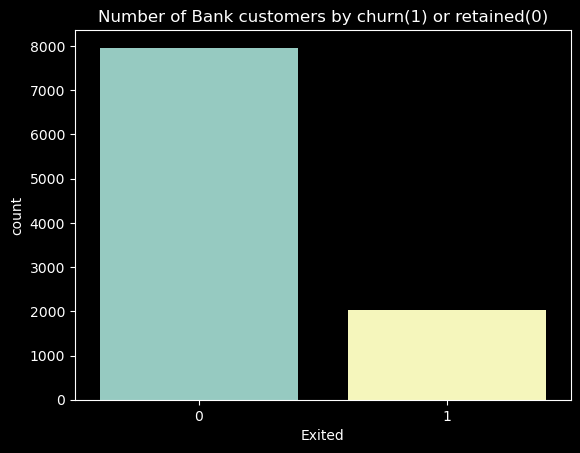

In [15]:
sns.countplot(data = df, x = 'Exited')
plt.title("Number of Bank customers by churn(1) or retained(0)")

## There is an imbalance of data in the target variable (churn or retain)

<Axes: xlabel='Gender', ylabel='count'>

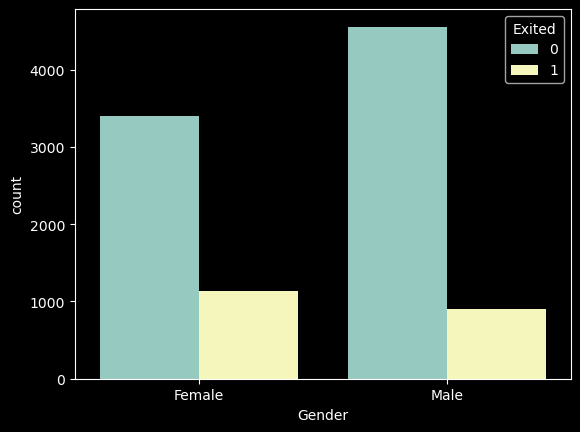

In [16]:
sns.countplot(data = df, x = 'Gender', hue = 'Exited')

#### female customers churned more than male customers

<Axes: xlabel='Age Group', ylabel='count'>

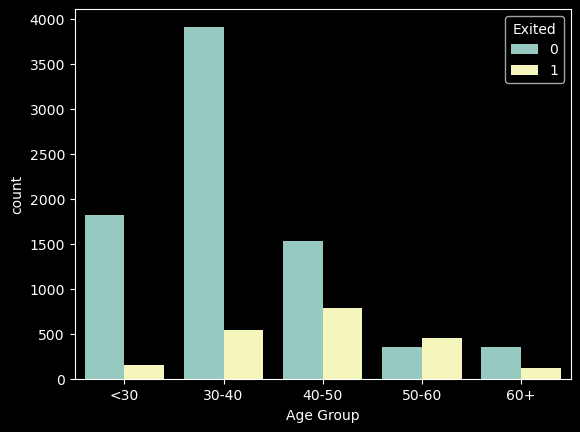

In [17]:
sns.countplot(data = df, x = 'Age Group', hue = 'Exited')

#### bank customers in 40-50 age group have higher churn % than other age groups

<Axes: xlabel='Geography', ylabel='count'>

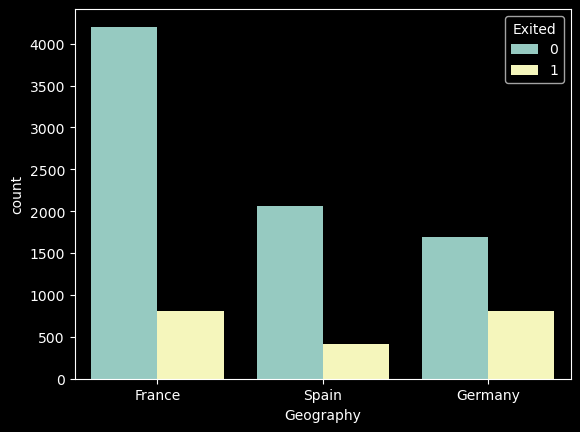

In [18]:
sns.countplot(data = df, x = 'Geography', hue = 'Exited')

<Axes: xlabel='HasCrCard', ylabel='count'>

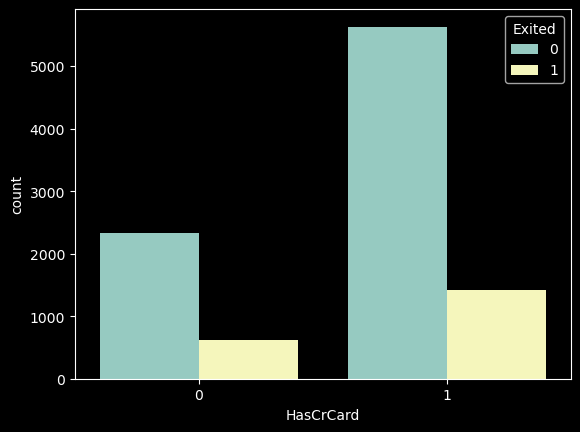

In [19]:
sns.countplot(data = df, x = 'HasCrCard', hue = 'Exited')

<Axes: xlabel='Card Type', ylabel='count'>

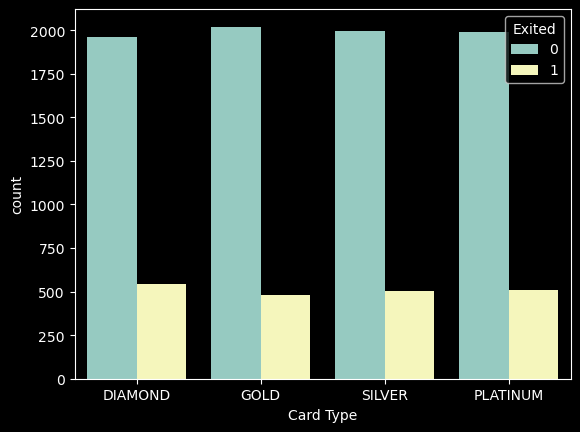

In [20]:
sns.countplot(data = df, x = 'Card Type', hue = 'Exited')

#### customers with Diamond status churn more than others

[1 3 2 4]


<Axes: xlabel='NumOfProducts', ylabel='count'>

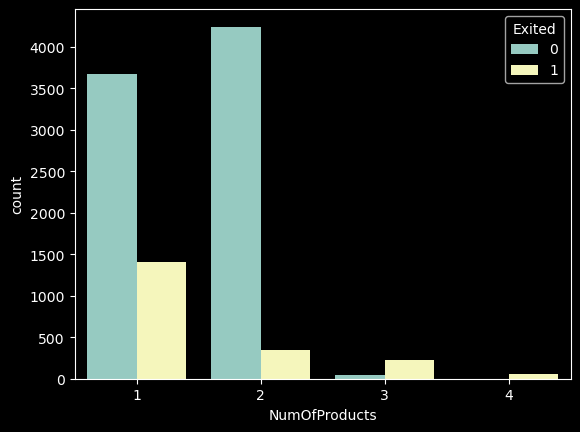

In [21]:
print(df['NumOfProducts'].unique())
sns.countplot(data = df, x = 'NumOfProducts', hue = 'Exited')

In [38]:
df.groupby(['NumOfProducts'])['Exited'].value_counts(normalize = True)

NumOfProducts  Exited
1              0         0.722856
               1         0.277144
2              0         0.923965
               1         0.076035
3              1         0.827068
               0         0.172932
4              1         1.000000
Name: Exited, dtype: float64

#### the more the number of products, better the chance a customer is going to leave. Probably because its hard to manage multiple products

[2 3 5 4 1]


<Axes: xlabel='Satisfaction Score', ylabel='count'>

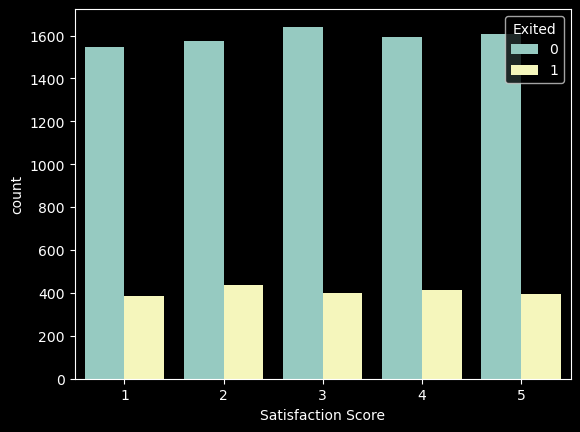

In [22]:
print(df['Satisfaction Score'].unique())

sns.countplot(data = df, x = 'Satisfaction Score', hue = 'Exited')

[1 0]


<Axes: xlabel='Complain', ylabel='count'>

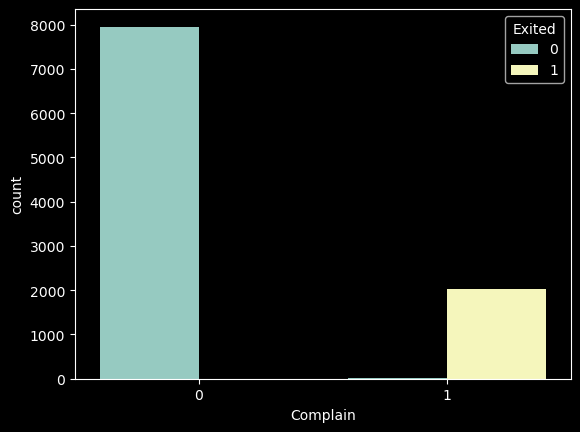

In [23]:
print(df['Complain'].unique())

sns.countplot(data = df, x = 'Complain', hue = 'Exited')

<Axes: xlabel='Age', ylabel='Count'>

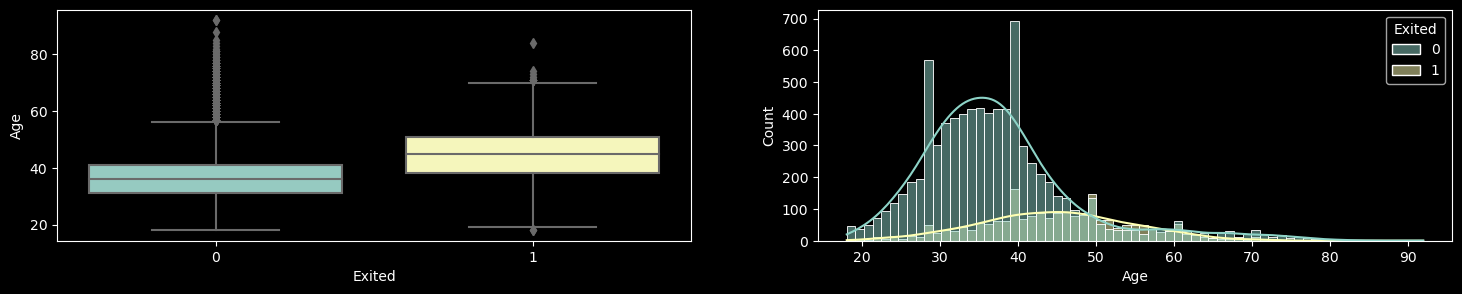

In [24]:
fig, axes = plt.subplots(1,2, figsize = (18, 3))

sns.boxplot(data = df, x = 'Exited', y = 'Age', ax = axes[0])
sns.histplot(data = df, x = 'Age', hue = 'Exited', kde = True, ax = axes[1])


<Axes: xlabel='CreditScore', ylabel='Count'>

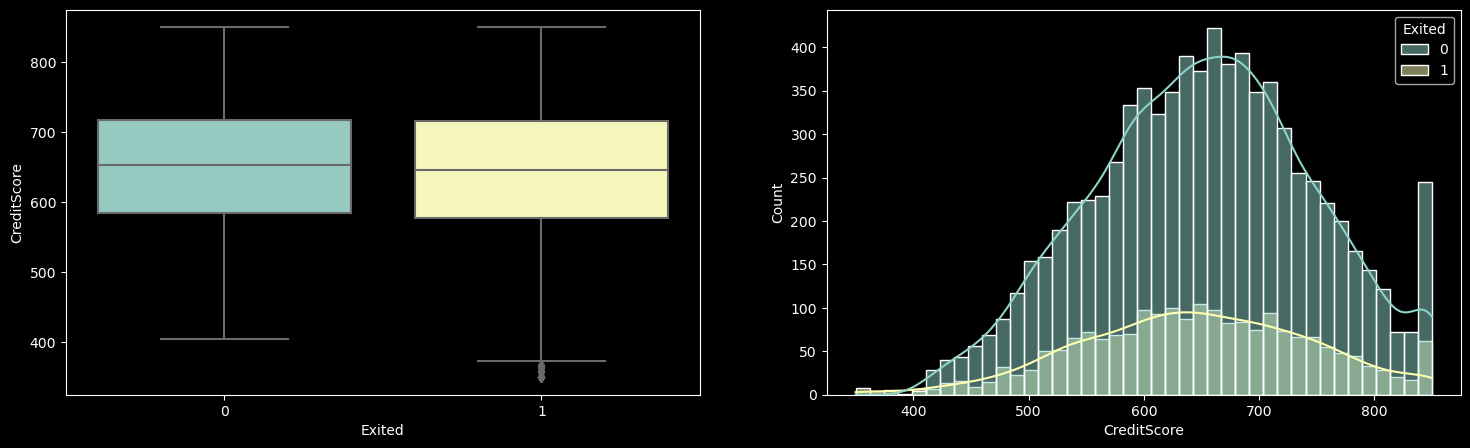

In [25]:
fig, axes = plt.subplots(1,2, figsize = (18, 5))
sns.boxplot(data = df, x = 'Exited', y = 'CreditScore', ax = axes[0])
sns.histplot(data = df, x = 'CreditScore', hue = 'Exited', kde = True, ax = axes[1])


#### more or less same distribution, therefore, they are not good features to help decide the prediction

<Axes: xlabel='Point Earned', ylabel='Count'>

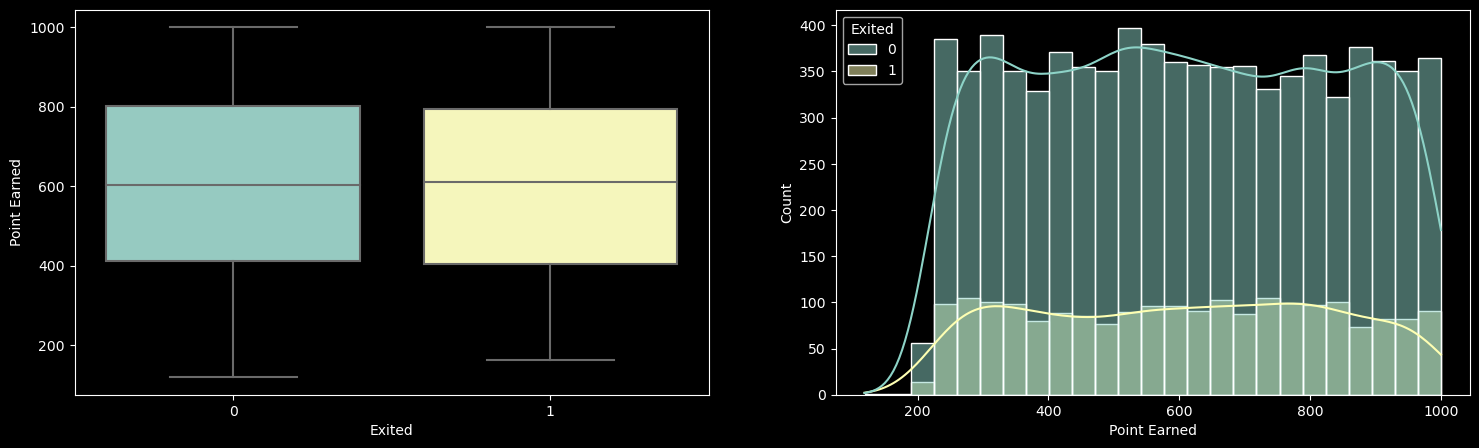

In [44]:
fig, axes = plt.subplots(1,2, figsize = (18, 5))
sns.boxplot(data = df, x = 'Exited', y = 'Point Earned', ax = axes[0])
sns.histplot(data = df, x = 'Point Earned', hue = 'Exited', kde = True, ax = axes[1])

#### more or less same distribution, therefore, they are not good features to help decide the prediction

<Axes: xlabel='Balance', ylabel='Count'>

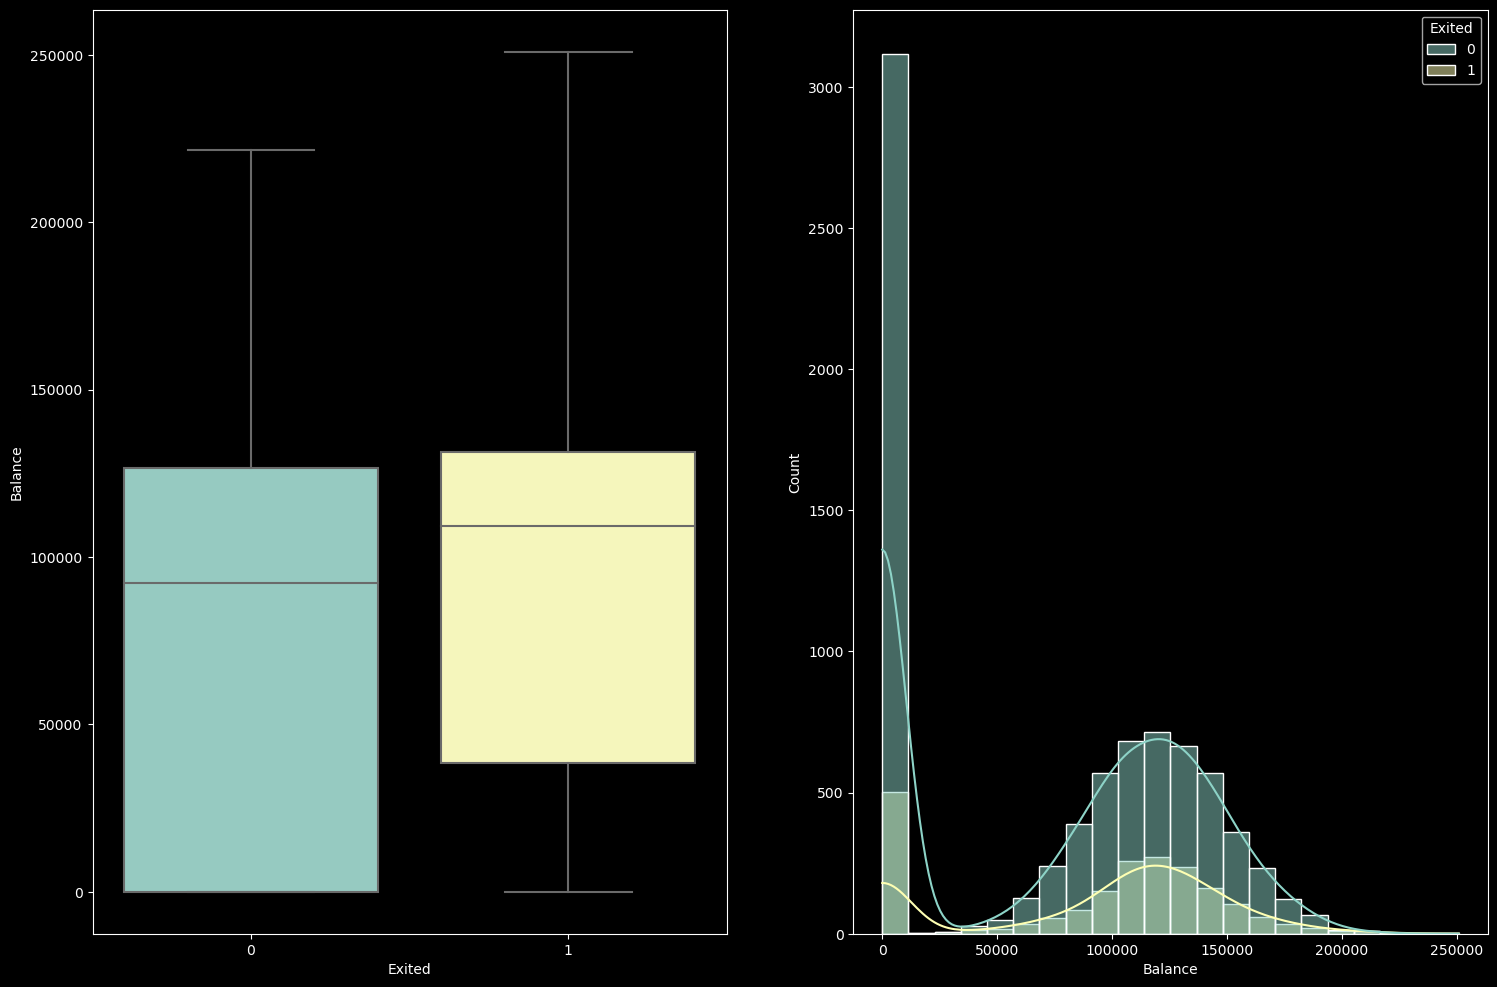

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (18,12))

sns.boxplot(data = df, x = 'Exited', y = 'Balance', ax = axes[0])
sns.histplot(data = df, x = 'Balance', hue = 'Exited', kde = True, ax = axes[1])

In [28]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import chisquare, chi2, chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import levene, kruskal
from statsmodels.graphics.gofplots import qqplot

#### lets check correaltion among the numerical variables

In [65]:
# num_var = list()
# [num_var.append(col) for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' ]

<Axes: >

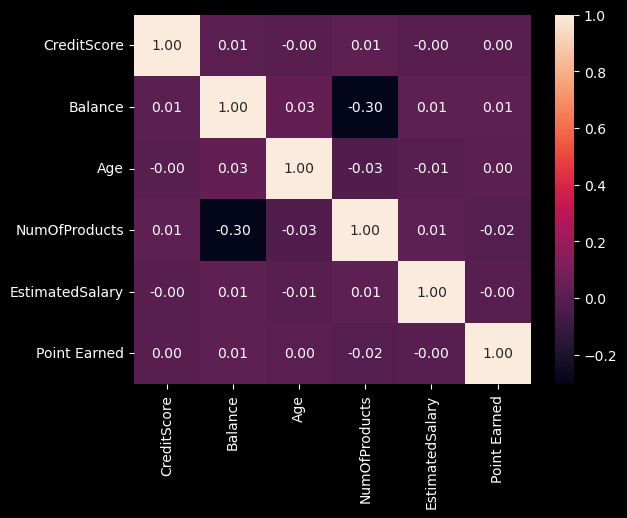

In [68]:
numerical_features = ['CreditScore','Balance', 'Age', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']

corr_matrix = df[numerical_features].corr()

sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

In [70]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


#### lets try to apply groupby  on all categorical variables to understand the impact of each on the target variable, which is exited or churn 

In [77]:
print(df.groupby(['HasCrCard'])['Exited'].mean()*100)
print(df.groupby(['Geography'])['Exited'].mean()*100)
print(df.groupby(['Gender'])['Exited'].mean()*100)
print(df.groupby(['Tenure'])['Exited'].mean()*100)
print(df.groupby(['Complain'])['Exited'].mean()*100)

HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64
Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64
Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64
Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64
Complain
0     0.050277
1    99.510763
Name: Exited, dtype: float64


#### 99% of people who had complained have exited- complaints are not being resolved

#### Hypothesis Testing

#### Null Hypo (H_0) : There is NO significant difference in satisfaction scores between customers who exited with complants and those who exited without complaints

#### Alternative (H_1) : THere is a significant difference in satisfacton scores between 2 groups

In [91]:
cross_tab_satisf_compla = pd.crosstab(df[df['Exited'] == 1]['Satisfaction Score'], df['Complain'])

chi2, p, _, _ = chi2_contingency(cross_tab_satisf_compla)

alpha = 0.05
if p < alpha:
    print("Reject H0 ", p)
else:
    print("ACCEPT NULL ", p)

ACCEPT NULL  0.525600639219834


#### null - there is NO sifnificant difference in mean credit scores between customers who exited and who did not.
#### alternate - there is significant difference
### alpha = 0.05

In [93]:
exited_cred_sc = df[df['Exited'] == 1]['CreditScore']
no_exited_cred_sc = df[df['Exited'] == 0]['CreditScore']

_, p = ttest_ind(exited_cred_sc, no_exited_cred_sc)
alpha = 0.05
if p < alpha:
    print("Reject H0 ", p)
else:
    print("ACCEPT NULL ", p)

Reject H0  0.0074220372427342435


In [94]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [102]:
contingency_table_inactive = pd.crosstab(index = df[df['IsActiveMember'] == 0 ]['Exited'], columns = df[df['Geography'] == 'Germany']['Geography'])
contingency_table_active = pd.crosstab(index = df[df['IsActiveMember'] == 1 ]['Exited'], columns = df[df['Geography'] == 'Germany']['Geography'])
contingency_table_inactive, contingency_table_active 

(Geography  Germany
 Exited            
 0              743
 1              518,
 Geography  Germany
 Exited            
 0              952
 1              296)

In [106]:
chi2, p, _, _ = chi2_contingency(pd.crosstab(index = df['IsActiveMember'], columns = df['Exited']))
alpha = 0.05
if p < alpha:
    print("Reject H0 ", p)
else:
    print("ACCEPT NULL ", p)

Reject H0  6.153167438113408e-55
